#### Step 1 : Data cleaning

prepare the data for machine learning.

- No duplicates
- No NANs
- No text data
- No features that have too strong correlation between them
- Use data normalization / scaling


In [1091]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [1092]:
df = pd.read_csv(r"C:\Users\32467\OneDrive\Documents\Arai4_Projects\real-estate-price-prediction\assets\data.csv")

In [1093]:
df.shape


(12813, 19)

In [1094]:
df = df.drop(['BuildingCondition','ConstructionYear','RegionCode','Locality','ID'], axis =1)


In [1095]:
df.isna().sum()

Type                        0
SubType                     0
Price                       0
NetHabitableSurface(msq)    0
BedroomCount                0
Province                    0
Region                      0
PostCode                    0
Floor                       0
FacadeCount                 0
HasBalcony                  0
HasGarden                   0
KitchenType                 0
Status                      0
dtype: int64

In [1096]:
df['Type'].value_counts()

HOUSE        6769
APARTMENT    6044
Name: Type, dtype: int64

In [1097]:
df.head()

,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Region,PostCode,Floor,FacadeCount,HasBalcony,HasGarden,KitchenType,Status
0,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
1,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
2,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
3,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
4,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Flanders,3520,2.0,4.0,0.0,1.0,0,0


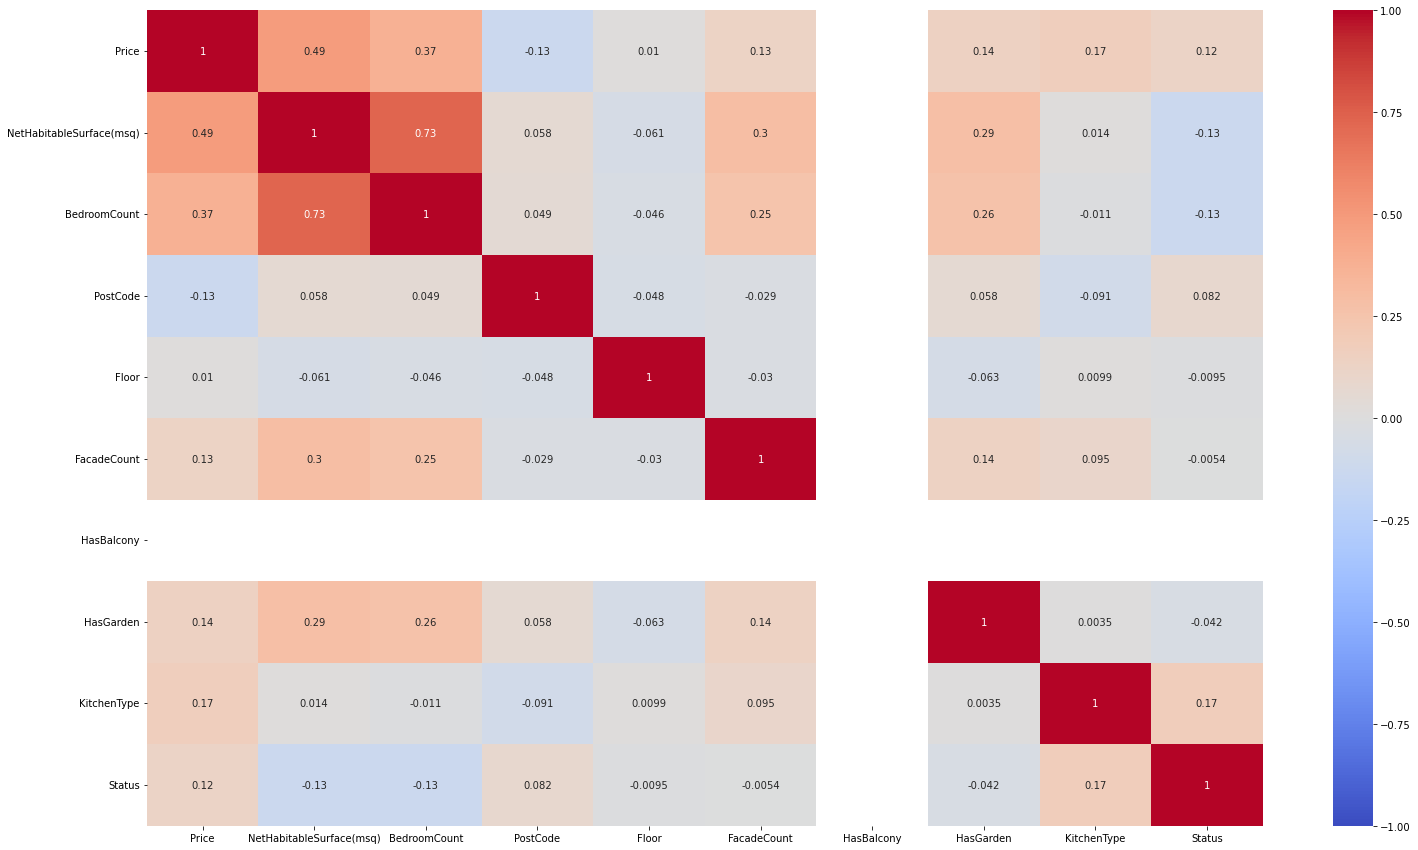

In [1098]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

####  Step 2: Data formatting
- Divide dataset for training and testing. (`X_train`, `y_train`, `X_test`, `y_test`)


In [1099]:
y= df['Price'].copy().to_numpy()
X = df.drop('Price', axis=1)

In [1100]:
print(X.shape)
print(y.shape)
X

(12813, 13)
(12813,)


,Type,SubType,NetHabitableSurface(msq),BedroomCount,Province,Region,PostCode,Floor,FacadeCount,HasBalcony,HasGarden,KitchenType,Status
0,HOUSE,HOUSE,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
1,HOUSE,HOUSE,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
2,HOUSE,HOUSE,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
3,HOUSE,HOUSE,148.0,3.0,Limburg,Flanders,3520,2.0,3.0,0.0,1.0,0,0
4,HOUSE,HOUSE,148.0,3.0,Limburg,Flanders,3520,2.0,4.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12808,APARTMENT,APARTMENT,78.0,2.0,West Flanders,Flanders,8500,2.0,2.0,0.0,1.0,1,0
12809,HOUSE,HOUSE,145.0,3.0,Flemish Brabant,Flanders,3010,2.0,1.0,0.0,1.0,1,0
12810,APARTMENT,APARTMENT,95.0,2.0,West Flanders,Flanders,8000,2.0,1.0,0.0,0.0,0,0
12811,HOUSE,HOUSE,166.0,3.0,Antwerp,Flanders,2223,2.0,1.0,0.0,0.0,3,0


In [1101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/5,random_state=0)

In [1102]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [1103]:
num_attribs = ['NetHabitableSurface(msq)','BedroomCount']
cat_attribs = ['Type','SubType','Province','PostCode']

num_tr_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
    
cat_tr_pipeline = Pipeline([
      # ('ordinal_encoder', OrdinalEncoder()),
        ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
        
    ])
    

full_pipeline = ColumnTransformer([
        ("num_tr_pipeline", num_tr_pipeline, num_attribs),
        ("cat_tr_pipeline", cat_tr_pipeline, cat_attribs),
    ])



In [1104]:
train_transformed = full_pipeline.fit_transform(X_train)
test_transformed = full_pipeline.transform(X_test)

In [1105]:
pd.DataFrame(train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,869,870,871,872,873,874,875,876,877,878
0,0.350772,-0.637228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.133234,1.406128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.097382,1.406128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.724797,-0.637228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.850280,-0.637228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,-0.527609,-0.637228,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10246,2.412278,1.406128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10247,0.834778,0.384450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10248,0.081880,0.384450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step 3: Model selection

The dataset is ready. Now let's select a model.



In [1106]:
def multi_linear_regressor():
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    regressor = LinearRegression()
    regressor.fit(train_transformed,y_train) 
    train_score = regressor.score(train_transformed, y_train)
    y_pred = regressor.predict(test_transformed)
    test_score = regressor.score(test_transformed, y_test)
    print('train score:', train_score)
    print('test score', test_score)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('the actual house price of the test data',y_test)
    print('the predicted house prices for the test data',y_pred)
    #return train_score,test_score,y_pred

In [1107]:
multi_linear_regressor()

train score: 0.6348393597715041
test score -2.115502019752817e+20
Mean Absolute Error: 240486903895274.03
Mean Squared Error: 3.7582549461759303e+30
Root Mean Squared Error: 1938621919347847.0
the actual house price of the test data [468000. 150000. 189000. ... 295000. 490000. 279000.]
the predicted house prices for the test data [404608. 251584. 207744. ... 234240. 518912. 360640.]


####  Using Random Forest Regresssor

In [1109]:
def random_forest_regressor():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn import metrics
    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(train_transformed, y_train)
    train_score = regressor.score(train_transformed, y_train)
    y_pred = regressor.predict(test_transformed)
    test_score = regressor.score(test_transformed, y_test)
    print('train score:', train_score)
    print('test score', test_score)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('the actual house price of the test data',y_test)
    print('the predicted house prices for the test data',y_pred)
    #return train_score,test_score,y_pred


In [1110]:
random_forest_regressor()

train score: 0.9378438660387916
test score 0.5847343988975642
Mean Absolute Error: 59101.10904951084
Mean Squared Error: 7377322189.946693
Root Mean Squared Error: 85891.33943504836
the actual house price of the test data [468000. 150000. 189000. ... 295000. 490000. 279000.]
the predicted house prices for the test data [368950.45       241937.49041667 184166.53833333 ... 305587.03809524
 439064.92857143 300450.        ]


#### Step 4: Model Training

Train your model on your data.


In [1111]:
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.pipeline import make_pipeline

# #model = make_pipeline(StandardScaler(with_mean=False), Ridge())

# lr_model_ridge = Ridge(alpha=0.05,normalize = True)

# lr_model_ridge.fit(train_transformed, y_train)

# print("R^2 Score Value (Test): ", lr_model_ridge.score(train_transformed, y_test), "\n")



In [1112]:
# import math
# from sklearn.linear_model import ElasticNet
# elasticreg=ElasticNet(alpha=0.001,normalize=True)
# elasticreg.fit(train_transformed,y_train)
# #print(sqrt(mean_squared_error(y_test,elasticreg.predict(test_transformed))))
# #print('R2 Value/Coefficient of determination:{}'.format(elasticreg.score(train_transformed,y_test))